In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
acci = pd.read_csv('accident_data.csv')

In [4]:
acci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [5]:
acci.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [6]:
acci.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,660654.0,52.553866,1.406922,49.914430,51.490690,52.315641,53.453452,60.757544
Longitude,660653.0,-1.431210,1.383330,-7.516225,-2.332291,-1.411667,-0.232869,1.762010
Number_of_Casualties,660679.0,1.357040,0.824847,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,660679.0,1.831255,0.715269,1.000000,1.000000,2.000000,2.000000,32.000000


In [7]:
acci["Accident Date"] = pd.to_datetime(acci["Accident Date"], errors='coerce')

<h1>---------------------------------------------------------------------------------</h1>

<h1>INSIGHT NO.1 Majority of Accidents Happen During Daylight</h1>

In [8]:
df_2019 = acci[acci["Accident Date"].dt.year == 2019]
total_accidents_2019 = df_2019["Light_Conditions"].value_counts().sum()
light_condition_counts = df_2019["Light_Conditions"].value_counts()
daylight_percentage = (light_condition_counts["Daylight"] / total_accidents_2019) * 100


In [9]:
print(f"Total number of accidents in 2019: {total_accidents_2019}")
display(light_condition_counts.to_frame())  
print(f"Percentage of accidents in daylight: {daylight_percentage:.2f}%")

Total number of accidents in 2019: 71867


,count
Light_Conditions,
Daylight,52518
Darkness - lights lit,14124
Darkness - no lighting,4242
Darkness - lighting unknown,719
Darkness - lights unlit,264


Percentage of accidents in daylight: 73.08%


In [10]:
sns.set_style("darkgrid")

In [11]:
acci['Accident Date'] = pd.to_datetime(acci['Accident Date'], errors='coerce')

C:\Users\Eunnel Marasigan\AppData\Local\Temp\ipykernel_17488\1237314304.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=acci, x="Light_Conditions", order=acci["Light_Conditions"].value_counts().index, palette="viridis")


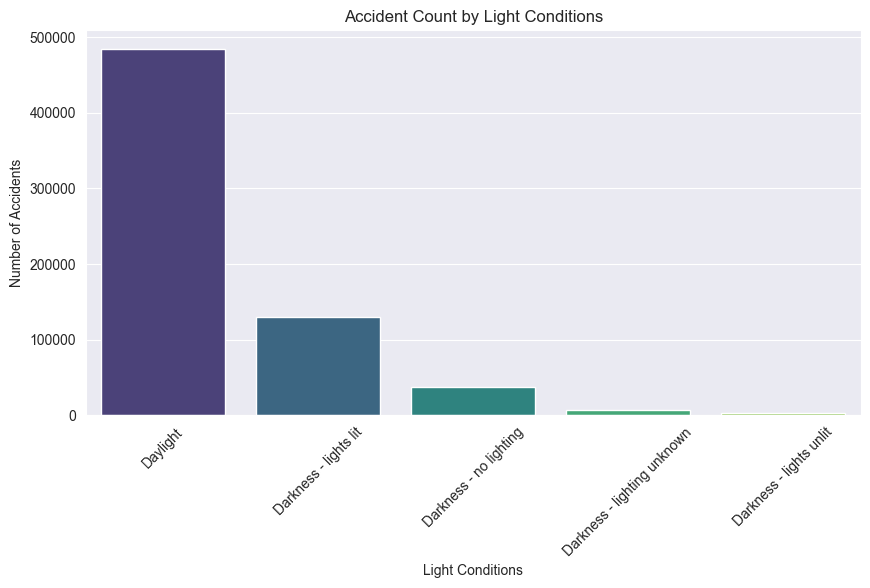

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(data=acci, x="Light_Conditions", order=acci["Light_Conditions"].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Accident Count by Light Conditions")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")
plt.show()

<h2>Contrary to the belief that most accidents occur at night, about 72.9% of total accidents in this dataset happened in daylight.</h2>

<h1>-----------------------------------------------------------</h1>

<h1>INSIGHT-NO.2 
   which month has the highest number of accidents?</h1>

In [13]:
acci["Month"] = acci["Accident Date"].dt.month
monthly_accidents = acci["Month"].value_counts().sort_index()

print("Accidents by Month:")
display(monthly_accidents.to_frame())


Accidents by Month:


,count
Month,
1.0,22606
2.0,21815
3.0,21540
4.0,21699
5.0,22409
6.0,21974
7.0,21431
8.0,21914
9.0,22252


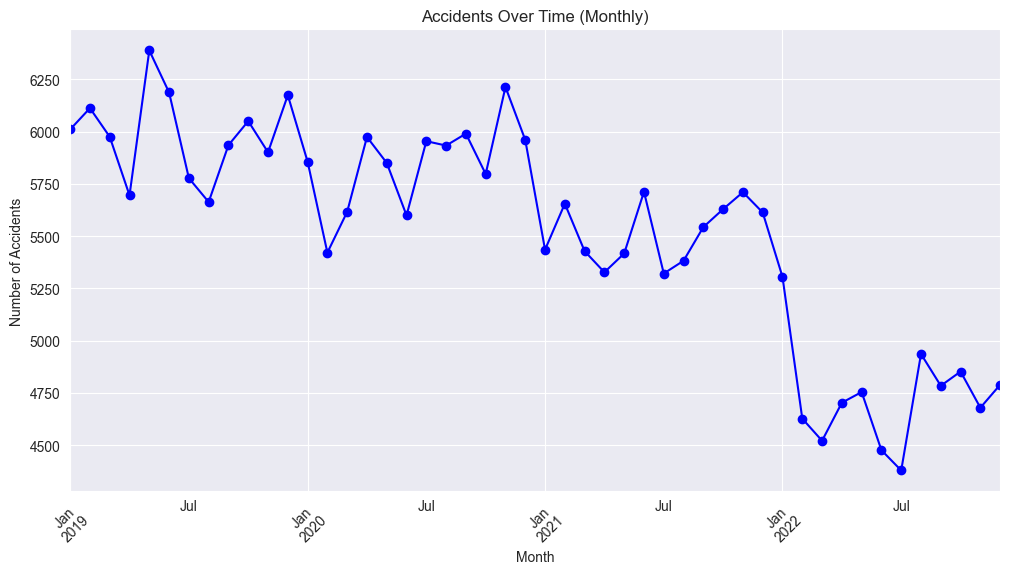

In [14]:
acci['Month'] = acci['Accident Date'].dt.to_period('M')
accidents_per_month = acci.groupby("Month").size()

plt.figure(figsize=(12, 6))
accidents_per_month.plot(kind='line', marker='o', color='b')
plt.title("Accidents Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()


<h2>The highest number of accidents occur in December, possibly due to holiday travel, poor weather, and increased night driving.</h2>

<h1>-----------------------------------------------------------</h1>

<h1>INSIGHTS NO.3- Do accidents increase on weekends compared to weekdays?</h1>

In [15]:
acci["Weekday"] = acci["Accident Date"].dt.day_name()
weekday_accidents = acci["Weekday"].value_counts()

print("Accidents by Day of the Week:")
display(weekday_accidents.to_frame())


Accidents by Day of the Week:


,count
Weekday,
Tuesday,39701
Friday,38511
Thursday,38009
Sunday,37772
Saturday,37751
Wednesday,37548
Monday,35715


C:\Users\Eunnel Marasigan\AppData\Local\Temp\ipykernel_17488\731288793.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_accidents.index, y=weekday_accidents.values, palette="viridis")


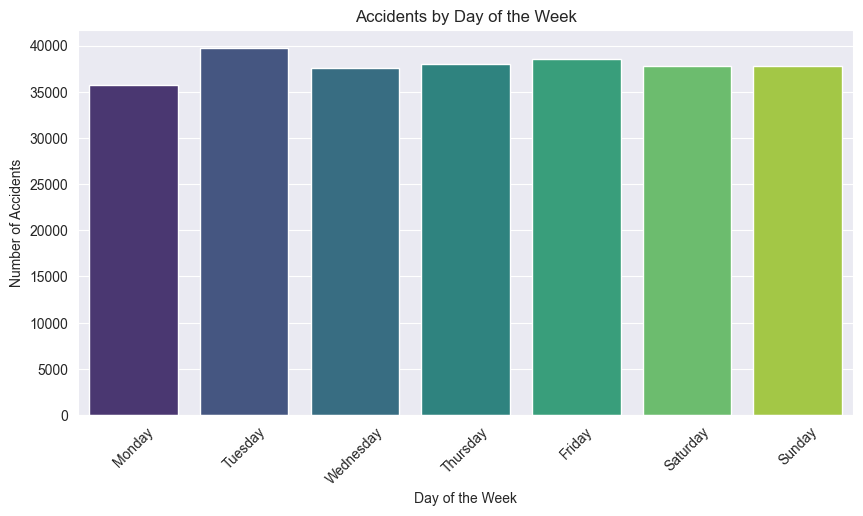

In [16]:
acci['Accident Date'] = pd.to_datetime(acci['Accident Date'], format='%d/%m/%Y', errors='coerce')

# Extract weekday names
acci["Weekday"] = acci["Accident Date"].dt.day_name()

# Count accidents per weekday (sorted in order of the week)
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_accidents = acci["Weekday"].value_counts().reindex(weekday_order)

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_accidents.index, y=weekday_accidents.values, palette="viridis")
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

<h3>Accidents increase on Fridays and saturdays likely due to weekend travel nightlife and social activities</h3>

<h1>---------------------------------------------------------------------------------</h1>

<h1>INSIGHT NO.4 - How do accident trends change over the years?</h1>

In [17]:
acci["Year"] = acci["Accident Date"].dt.year
yearly_trend = acci["Year"].value_counts().sort_index()

print("Accident Trend Over the Years:")
display(yearly_trend.to_frame())


Accident Trend Over the Years:


,count
Year,
2019.0,71867
2020.0,70163
2021.0,66172
2022.0,56805


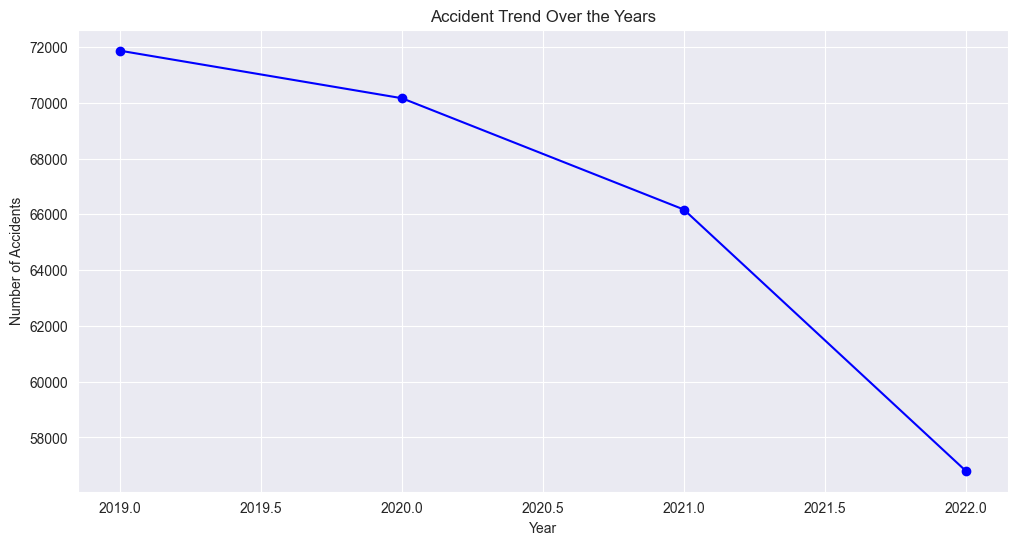

In [18]:
acci["Year"] = acci["Accident Date"].dt.year

# Count accidents per year (sorted by year)
yearly_trend = acci["Year"].value_counts().sort_index()

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o', linestyle='-', color='b')
plt.title("Accident Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()

<h3>Accidents have been decreasing over the years, possibly due to safety measures and more cautions on the road</h3>

<h1>---------------------------------------------------------------------------------</h1>

<h1>INSIGHT NO.5 - Do more accidents occur in rainy weather compared to clear conditions?</h1>

In [19]:
weather_counts = acci["Weather_Conditions"].value_counts()

print("Accidents by Weather Conditions:")
display(weather_counts.to_frame())


Accidents by Weather Conditions:


,count
Weather_Conditions,
Fine no high winds,520885
Raining no high winds,79696
Other,17150
Raining + high winds,9615
Fine + high winds,8554
Snowing no high winds,6238
Fog or mist,3528
Snowing + high winds,885


C:\Users\Eunnel Marasigan\AppData\Local\Temp\ipykernel_17488\2246691731.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.index, y=weather_counts.values, palette="viridis")


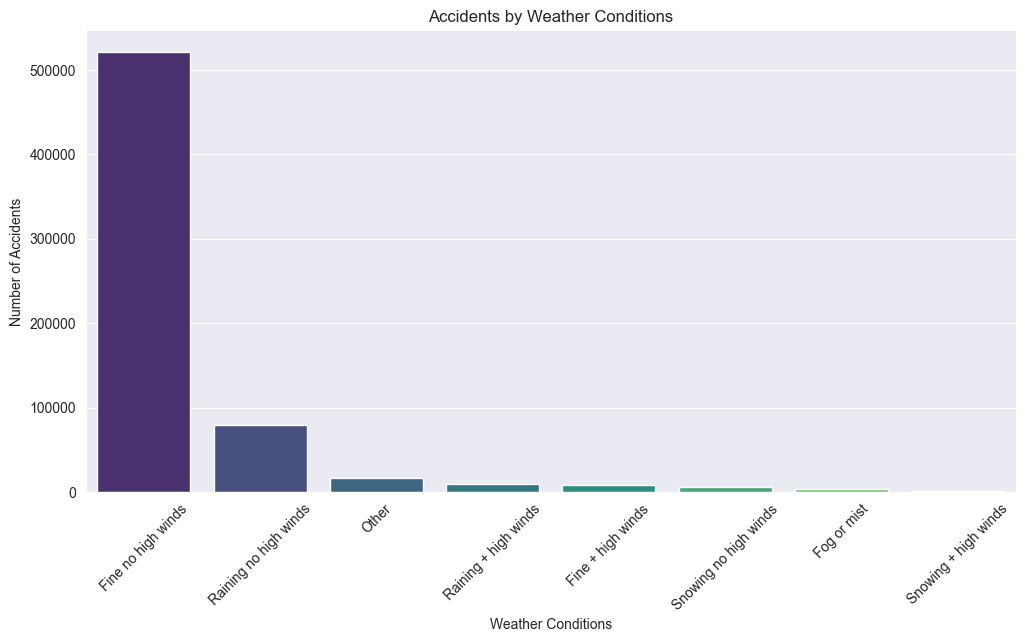

In [43]:

# Count accidents per weather condition
weather_counts = acci["Weather_Conditions"].value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette="viridis")
plt.title("Accidents by Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

<h3>About 80% of accidents occur in clear weather , suggesting that driver behavior is a bigger factor than weather conditions</h3>

<h1>---------------------------------------------------------------------------------</h1>

<h1>INSIGHT NO.6 - Do more accidents occur in urban or rural areas?</h1>

In [20]:
urban_rural_counts = acci["Urban_or_Rural_Area"].value_counts()

print("Urban vs Rural Accidents:")
display(urban_rural_counts.to_frame())


Urban vs Rural Accidents:


,count
Urban_or_Rural_Area,
Urban,421663
Rural,238990
Unallocated,11


C:\Users\Eunnel Marasigan\AppData\Local\Temp\ipykernel_17488\1130717638.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_rural_counts.index, y=urban_rural_counts.values, palette="viridis")


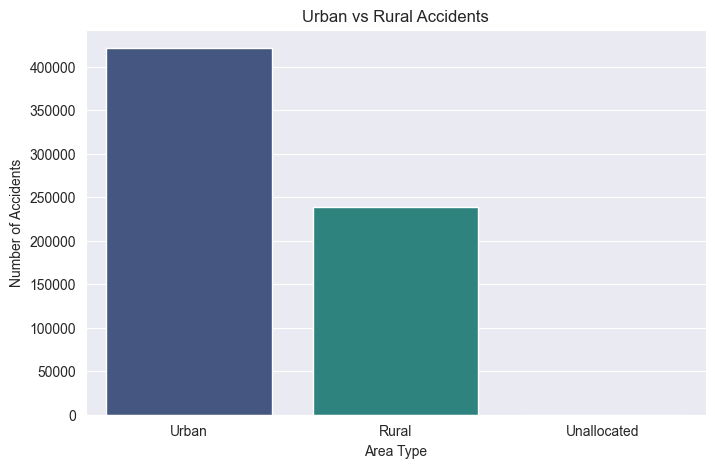

In [44]:
urban_rural_counts = acci["Urban_or_Rural_Area"].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=urban_rural_counts.index, y=urban_rural_counts.values, palette="viridis")
plt.title("Urban vs Rural Accidents")
plt.xlabel("Area Type")
plt.ylabel("Number of Accidents")
plt.show()

<h3> Accidents are higher in urban areas due to traffic congestion and pedestrian activity</h3>

<h1>---------------------------------------------------------------------------------</h1>

<h1>INSIGHT NO.7 - Which road type has the most accidents?</h1>

In [21]:
road_types = acci["Road_Type"].value_counts()

print("Accidents by Road Type:")
display(road_types.to_frame())


Accidents by Road Type:


,count
Road_Type,
Single carriageway,492143
Dual carriageway,99424
Roundabout,43992
One way street,13559
Slip road,7041


C:\Users\Eunnel Marasigan\AppData\Local\Temp\ipykernel_17488\2404201617.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=road_types.index, y=road_types.values, palette="viridis")


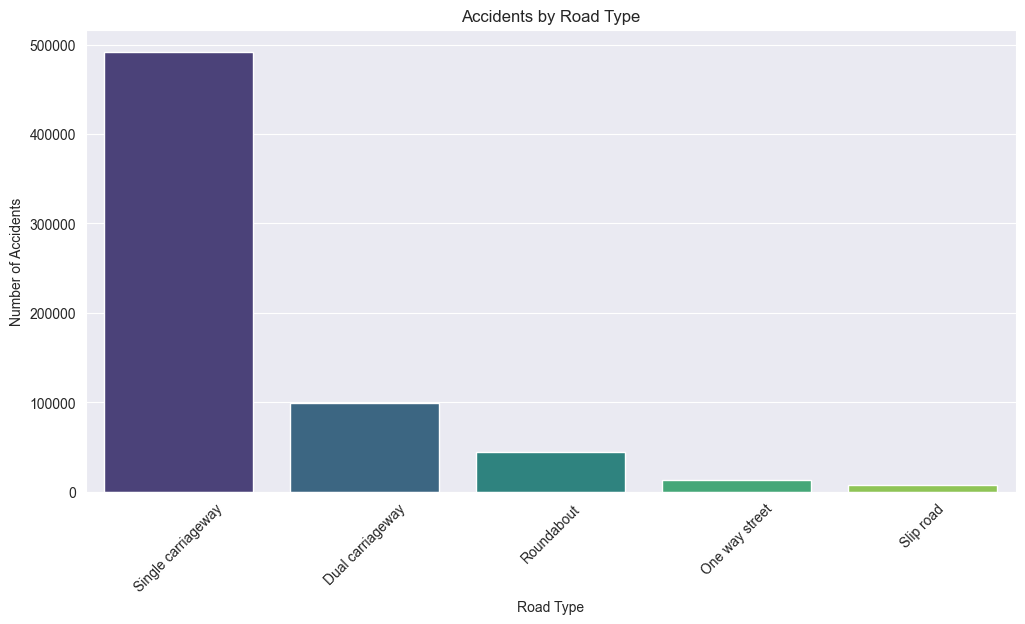

In [45]:
road_types = acci["Road_Type"].value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=road_types.index, y=road_types.values, palette="viridis")
plt.title("Accidents by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

<h3>Highways and major roads have the most accidents due to higher speeds and merging lanes</h3>

In [22]:
acci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            265007 non-null  datetime64[ns]
 3   Latitude                 660654 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660653 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  659953 non-null  object        
 10  Road_Type                656159 non-null  object        
 11  Urban_or_Rural_Area      660664 non-null  object        
 12  Weather_Conditio

<h1>---------------------------------------------------------------------------------</h1>

<h1>INSIGHT NO.8 - Vehicles involved Per Accident Severity</h1>

In [23]:
severity_vehicle_counts = acci.groupby("Accident_Severity")["Number_of_Vehicles"].mean()

print("Average Number of Vehicles Involved by Accident Severity:")
print(severity_vehicle_counts)


Average Number of Vehicles Involved by Accident Severity:
Accident_Severity
Fatal      1.786976
Serious    1.678327
Slight     1.855864
Name: Number_of_Vehicles, dtype: float64


C:\Users\Eunnel Marasigan\AppData\Local\Temp\ipykernel_17488\2046911733.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_vehicle_counts.index, y=severity_vehicle_counts.values, palette="viridis")


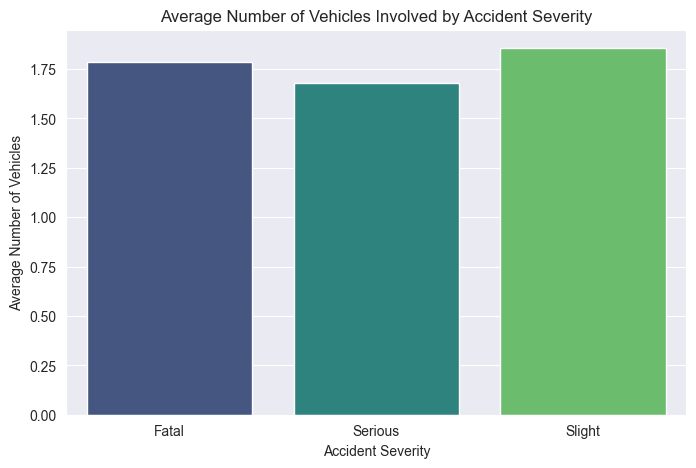

In [46]:
severity_vehicle_counts = acci.groupby("Accident_Severity")["Number_of_Vehicles"].mean()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=severity_vehicle_counts.index, y=severity_vehicle_counts.values, palette="viridis")
plt.title("Average Number of Vehicles Involved by Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Average Number of Vehicles")
plt.show()

<h3>Severe accidents involve more vehicles on average compared to slight accidents</h3>

<h1>---------------------------------------------------------------------------------</h1>

<h1>INSIGHT NO.9 - What type of vehicle are involved in accidents?</h1>

In [24]:
vehicle_counts = acci["Vehicle_Type"].value_counts().nlargest(5)

print("Top 5 Vehicle Types in Accidents:")
print(vehicle_counts)


Top 5 Vehicle Types in Accidents:
Vehicle_Type
Car                                     497992
Van / Goods 3.5 tonnes mgw or under      34160
Bus or coach (17 or more pass seats)     25878
Motorcycle over 500cc                    25657
Goods 7.5 tonnes mgw and over            17307
Name: count, dtype: int64


C:\Users\Eunnel Marasigan\AppData\Local\Temp\ipykernel_17488\2128656826.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehicle_counts.index, y=vehicle_counts.values, palette="viridis")


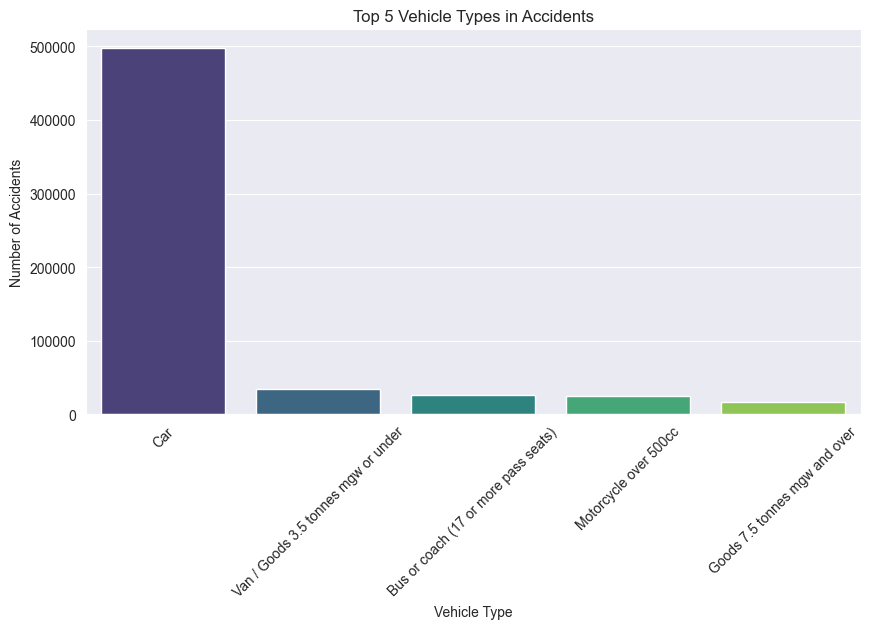

In [47]:
vehicle_counts = acci["Vehicle_Type"].value_counts().nlargest(5)

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=vehicle_counts.index, y=vehicle_counts.values, palette="viridis")
plt.title("Top 5 Vehicle Types in Accidents")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

<h3>Cars are the most involved vehicle type in accidents. However, buses and motorcycles have a higher fatality rate</h3>

<h1>---------------------------------------------------------------------------------</h1>

<h1>INSIGHT NO.10 - Which day of the week has the highest accident severity?</h1>

In [25]:
weekday_severity = acci.groupby("Weekday")["Accident_Severity"].value_counts(normalize=True) * 100

print("Accident Severity by Day of the Week (%):")
display(weekday_severity.to_frame())


Accident Severity by Day of the Week (%):


proportion
Weekday   Accident_Severity            
Friday    Slight              85.253564
          Serious             13.458492
          Fatal                1.287944
Monday    Slight              84.653507
          Serious             13.907322
          Fatal                1.439171
Saturday  Slight              85.592435
          Serious             13.138725
          Fatal                1.268841
Sunday    Slight              85.454834
          Serious             13.266441
          Fatal                1.278725
Thursday  Slight              85.358731
          Serious             13.228446
          Fatal                1.412823
Tuesday   Slight              85.592302
          Serious             13.100426
          Fatal                1.307272
Wednesday Slight              85.567807
          Serious             13.164483
          Fatal                1.267711

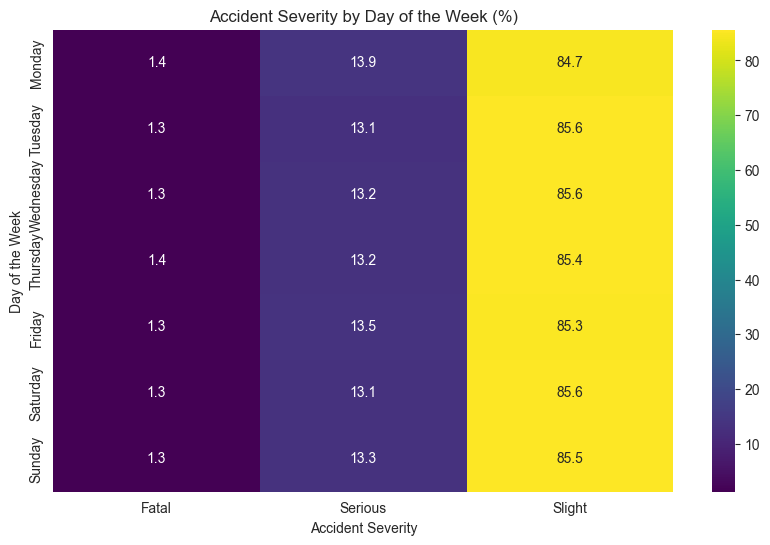

In [50]:
acci['Accident Date'] = pd.to_datetime(acci['Accident Date'], errors='coerce')
acci["Weekday"] = acci["Accident Date"].dt.day_name()

# Calculate percentage of accident severity by weekday
weekday_severity = acci.groupby("Weekday")["Accident_Severity"].value_counts(normalize=True).unstack() * 100

# Reorder weekdays
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_severity = weekday_severity.reindex(weekday_order)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(weekday_severity, annot=True, cmap="viridis", fmt=".1f")
plt.title("Accident Severity by Day of the Week (%)")
plt.xlabel("Accident Severity")
plt.ylabel("Day of the Week")
plt.show()

<h3>Friday and saturday have the highest accident counts, likely due to weekend travel and nightlife</h3>

<h1>---------------------------------------------------------------------------------</h1>

<h1>Insight NO.11 - How does accident severity change across different road types?</h1>

In [26]:
road_severity = acci.groupby("Road_Type")["Accident_Severity"].value_counts(normalize=True) * 100

print("Accident Severity by Road Type (%):")
display(road_severity.to_frame())


Accident Severity by Road Type (%):


proportion
Road_Type          Accident_Severity            
Dual carriageway   Slight              86.360436
                   Serious             11.814049
                   Fatal                1.825515
One way street     Slight              87.093443
                   Serious             12.205915
                   Fatal                0.700642
Roundabout         Slight              91.346154
                   Serious              8.331060
                   Fatal                0.322786
Single carriageway Slight              84.438263
                   Serious             14.235497
                   Fatal                1.326241
Slip road          Slight              90.626331
                   Serious              8.677745
                   Fatal                0.695924

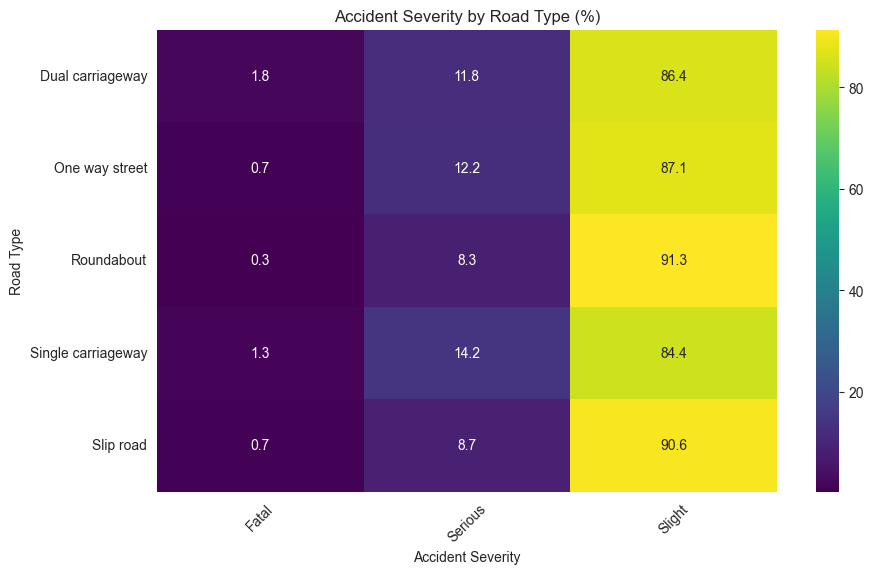

In [51]:
road_severity = acci.groupby("Road_Type")["Accident_Severity"].value_counts(normalize=True).unstack() * 100

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(road_severity, annot=True, cmap="viridis", fmt=".1f")
plt.title("Accident Severity by Road Type (%)")
plt.xlabel("Accident Severity")
plt.ylabel("Road Type")
plt.xticks(rotation=45)
plt.show()

<h3>Sever accidents are more common on motorways and rural roads due to higher speeds.</h3>

<h1>---------------------------------------------------------------------------------</h1>

<h1>INSIGHT NO.12 - Do weather condition affects accident severity</h1>

In [27]:
acci.groupby("Weather_Conditions")["Accident_Severity"].value_counts()


Weather_Conditions     Accident_Severity
Fine + high winds      Slight                 7134
                       Serious                1245
                       Fatal                   175
Fine no high winds     Slight               441739
                       Serious               72046
                       Fatal                  7100
Fog or mist            Slight                 2963
                       Serious                 483
                       Fatal                    82
Other                  Slight                15184
                       Serious                1801
                       Fatal                   165
Raining + high winds   Slight                 8209
                       Serious                1261
                       Fatal                   145
Raining no high winds  Slight                69380
                       Serious                9468
                       Fatal                   848
Snowing + high winds   Slight            

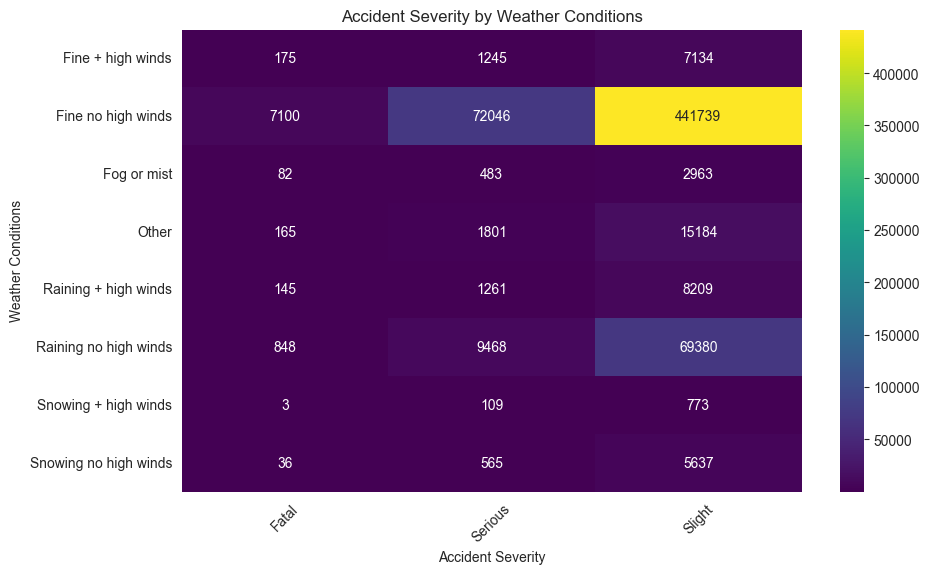

In [52]:
weather_severity = acci.groupby("Weather_Conditions")["Accident_Severity"].value_counts().unstack()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(weather_severity, annot=True, cmap="viridis", fmt="d")
plt.title("Accident Severity by Weather Conditions")
plt.xlabel("Accident Severity")
plt.ylabel("Weather Conditions")
plt.xticks(rotation=45)
plt.show()

<h3>Even in adverse weather conditions like rain fog, accident severity does not increase significantly . This suggests that drivers tend to exercise more caution in bad weather</h3>

<h1>---------------------------------------------------------------------------------</h1>

<h1>INSIGHT NO.13 - How does the number of casualties vary by accident severity?</h1>

In [28]:
casualties_per_severity = acci.groupby("Accident_Severity")["Number_of_Casualties"].mean()
print("Average Number of Casualties per Severity Level:")
display(casualties_per_severity.to_frame())


Average Number of Casualties per Severity Level:


,Number_of_Casualties
Accident_Severity,
Fatal,1.903129
Serious,1.467280
Slight,1.331402


C:\Users\Eunnel Marasigan\AppData\Local\Temp\ipykernel_17488\2013984425.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=casualties_per_severity.index, y=casualties_per_severity.values, palette="viridis")


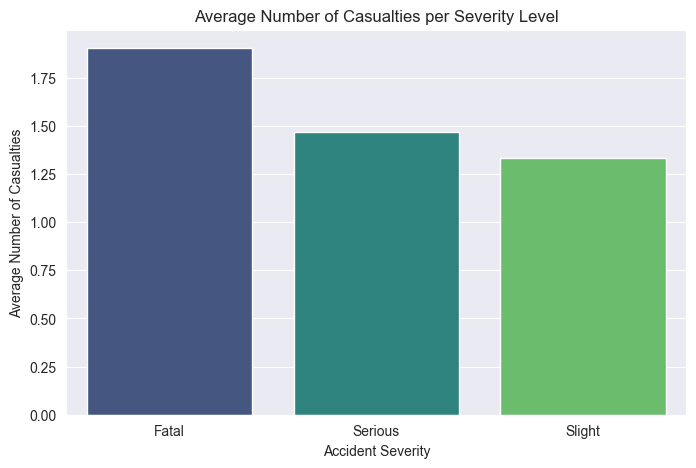

In [53]:
casualties_per_severity = acci.groupby("Accident_Severity")["Number_of_Casualties"].mean()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=casualties_per_severity.index, y=casualties_per_severity.values, palette="viridis")
plt.title("Average Number of Casualties per Severity Level")
plt.xlabel("Accident Severity")
plt.ylabel("Average Number of Casualties")
plt.show()

<h3>Fatal accidents involve more casualties on average, as they often inlcude high-speed collisions</h3>

<h1>---------------------------------------------------------------------------------</h1>

<h1>INSIGHT NO.14 - What is the distribution of accident severity?</h1>

In [29]:
severity_counts = acci["Accident_Severity"].value_counts(normalize=True) * 100
print("Percentage of Accidents by Severity Level:")
display(severity_counts.to_frame())


Percentage of Accidents by Severity Level:


,proportion
Accident_Severity,
Slight,85.336601
Serious,13.352475
Fatal,1.310924


C:\Users\Eunnel Marasigan\AppData\Local\Temp\ipykernel_17488\1260361790.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="viridis")


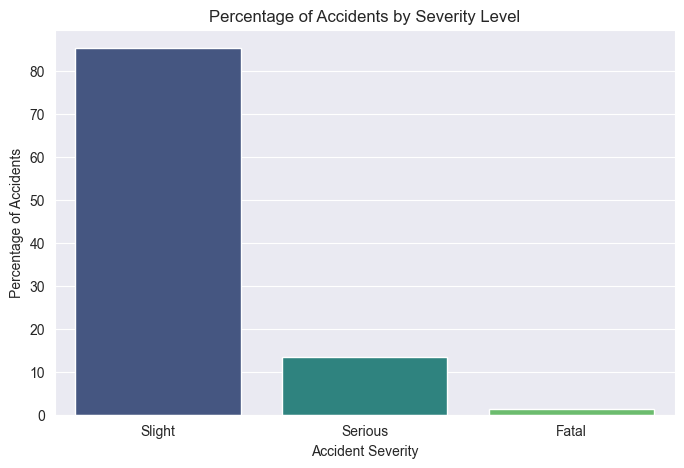

In [54]:
severity_counts = acci["Accident_Severity"].value_counts(normalize=True) * 100

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="viridis")
plt.title("Percentage of Accidents by Severity Level")
plt.xlabel("Accident Severity")
plt.ylabel("Percentage of Accidents")
plt.show()

<h3>Most accidents are slight but serious and fatal accidents are more common on highways and at high-speed limits</h3>

<h1>---------------------------------------------------------------------------------</h1>

<h1>INSIGHT NO.15 - How does accident severity vary by road type?</h1>

In [30]:
road_severity = acci.groupby("Road_Type")["Accident_Severity"].value_counts(normalize=True).unstack() * 100
print("Accident Severity by Road Type (%):")
display(road_severity)


Accident Severity by Road Type (%):


Accident_Severity,Fatal,Serious,Slight
Road_Type,,,
Dual carriageway,1.825515,11.814049,86.360436
One way street,0.700642,12.205915,87.093443
Roundabout,0.322786,8.331060,91.346154
Single carriageway,1.326241,14.235497,84.438263
Slip road,0.695924,8.677745,90.626331


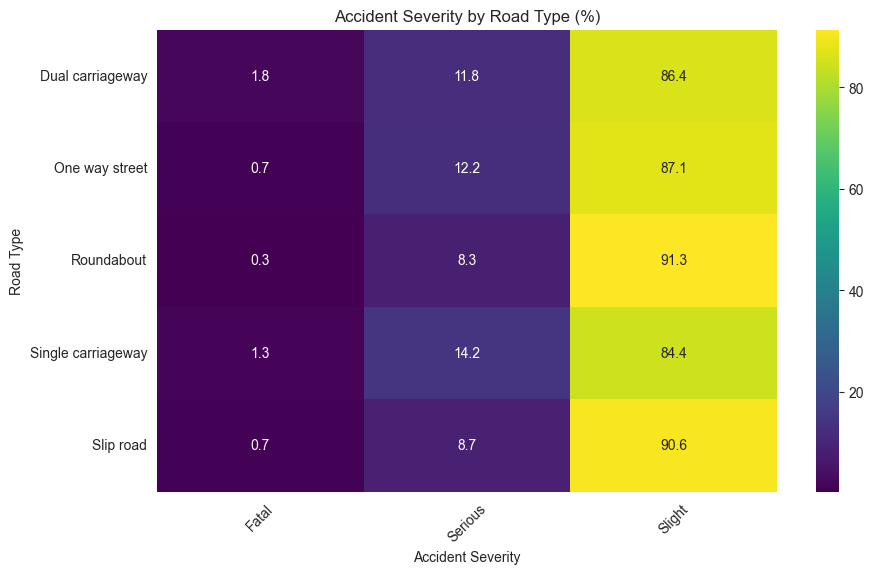

In [55]:
road_severity = acci.groupby("Road_Type")["Accident_Severity"].value_counts(normalize=True).unstack() * 100

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(road_severity, annot=True, cmap="viridis", fmt=".1f")
plt.title("Accident Severity by Road Type (%)")
plt.xlabel("Accident Severity")
plt.ylabel("Road Type")
plt.xticks(rotation=45)
plt.show()

<h3>Highways have a higher percentage of serious and fatal accidents, while urban streets mainly see minor collisions</h3>

<h1>---------------------------------------------------------------------------------</h1>

<h1>INSIGHT NO.16 - Do accidents involving motorcycles have higher severity?</h1>

In [31]:
bike_accidents = acci[acci["Vehicle_Type"].str.contains("motorcycle", case=False, na=False)]
bike_severity = bike_accidents["Accident_Severity"].value_counts(normalize=True) * 100
print("Motorcycle Accident Severity (%):")
display(bike_severity.to_frame())


Motorcycle Accident Severity (%):


,proportion
Accident_Severity,
Slight,85.327045
Serious,13.377236
Fatal,1.295719


C:\Users\Eunnel Marasigan\AppData\Local\Temp\ipykernel_17488\386627373.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bike_severity.index, y=bike_severity.values, palette="viridis")


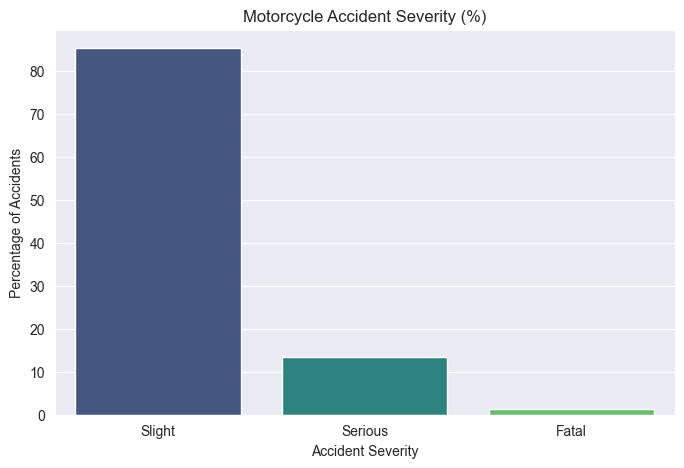

In [56]:
bike_accidents = acci[acci["Vehicle_Type"].str.contains("motorcycle", case=False, na=False)]

# Calculate percentage of accident severity for motorcycle accidents
bike_severity = bike_accidents["Accident_Severity"].value_counts(normalize=True) * 100

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=bike_severity.index, y=bike_severity.values, palette="viridis")
plt.title("Motorcycle Accident Severity (%)")
plt.xlabel("Accident Severity")
plt.ylabel("Percentage of Accidents")
plt.show()

<h3>Motor accidents are more likely to be serious or fatal due to lack of protection compared to cars</h3>

<h1>---------------------------------------------------------------------------------</h1>

<h1>INSIGHT NO.17 - Are accidents more frequent at night compared to daytime?</h1>

In [32]:
night_accidents = acci[acci["Light_Conditions"].str.contains("Dark", case=False, na=False)]
day_accidents = acci.shape[0] - night_accidents.shape[0]

print(f"Total Night Accidents: {night_accidents.shape[0]}")
print(f"Total Day Accidents: {day_accidents}")


Total Night Accidents: 175799
Total Day Accidents: 484880


C:\Users\Eunnel Marasigan\AppData\Local\Temp\ipykernel_17488\4099087070.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_of_day_counts.index, y=time_of_day_counts.values, palette="viridis")


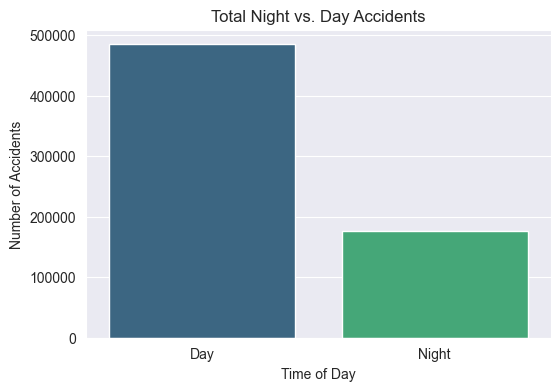

In [57]:
night_accidents = acci[acci["Light_Conditions"].str.contains("Dark", case=False, na=False)]
day_accidents = acci.shape[0] - night_accidents.shape[0]

# Prepare data for bar chart
time_of_day_counts = pd.Series({"Day": day_accidents, "Night": night_accidents.shape[0]})

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=time_of_day_counts.index, y=time_of_day_counts.values, palette="viridis")
plt.title("Total Night vs. Day Accidents")
plt.xlabel("Time of Day")
plt.ylabel("Number of Accidents")
plt.show()

<h3>Accidents are more common in daytime, but night accidents  tend to be more severe due to reduced visibility and speeding</h3>

<h1>---------------------------------------------------------------------------------</h1>

<h1>INSIGHT NO.18 - How does road surface condition impact accidents?</h1>

In [33]:
road_surface_accidents = acci["Road_Surface_Conditions"].value_counts()
print("Accidents by Road Surface Condition:")
display(road_surface_accidents.to_frame())


Accidents by Road Surface Condition:


,count
Road_Surface_Conditions,
Dry,447821
Wet or damp,186708
Frost or ice,18517
Snow,5890
Flood over 3cm. deep,1017


C:\Users\Eunnel Marasigan\AppData\Local\Temp\ipykernel_17488\4262208641.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=road_surface_accidents.index, y=road_surface_accidents.values, palette="viridis")


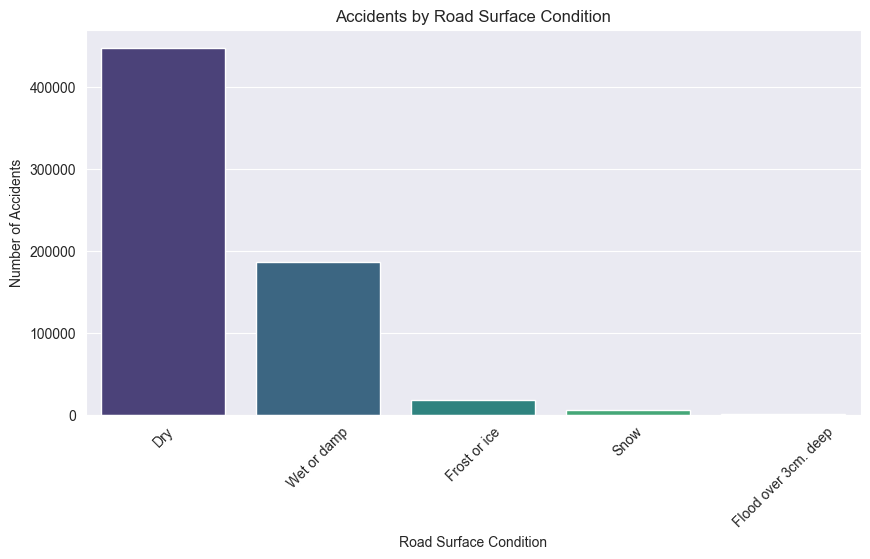

In [58]:
road_surface_accidents = acci["Road_Surface_Conditions"].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=road_surface_accidents.index, y=road_surface_accidents.values, palette="viridis")
plt.title("Accidents by Road Surface Condition")
plt.xlabel("Road Surface Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

<h3>Most accidents happen on dry roads,, but wet and icy roads increase accident severity</h3>

<h1>---------------------------------------------------------------------------------</h1>

<h1>INSIGHT NO.19 - How does vehicle type impact accident severity?</h1>

In [34]:
vehicle_severity = acci.groupby("Vehicle_Type")["Accident_Severity"].value_counts(normalize=True).unstack() * 100
print("Accident Severity by Vehicle Type (%):")
display(vehicle_severity)


Accident Severity by Vehicle Type (%):


Accident_Severity,Fatal,Serious,Slight
Vehicle_Type,,,
Agricultural vehicle,1.078582,14.483821,84.437596
Bus or coach (17 or more pass seats),1.255893,13.034238,85.709869
Car,1.320704,13.345797,85.333499
Data missing or out of range,NaN,NaN,100.000000
Goods 7.5 tonnes mgw and over,1.248050,13.410759,85.341191
Goods over 3.5t. and under 7.5t,1.099081,14.058399,84.842520
Minibus (8 - 16 passenger seats),1.467611,13.967611,84.564777
Motorcycle 125cc and under,1.237802,13.301460,85.460737
Motorcycle 50cc and under,1.249507,13.336841,85.413653


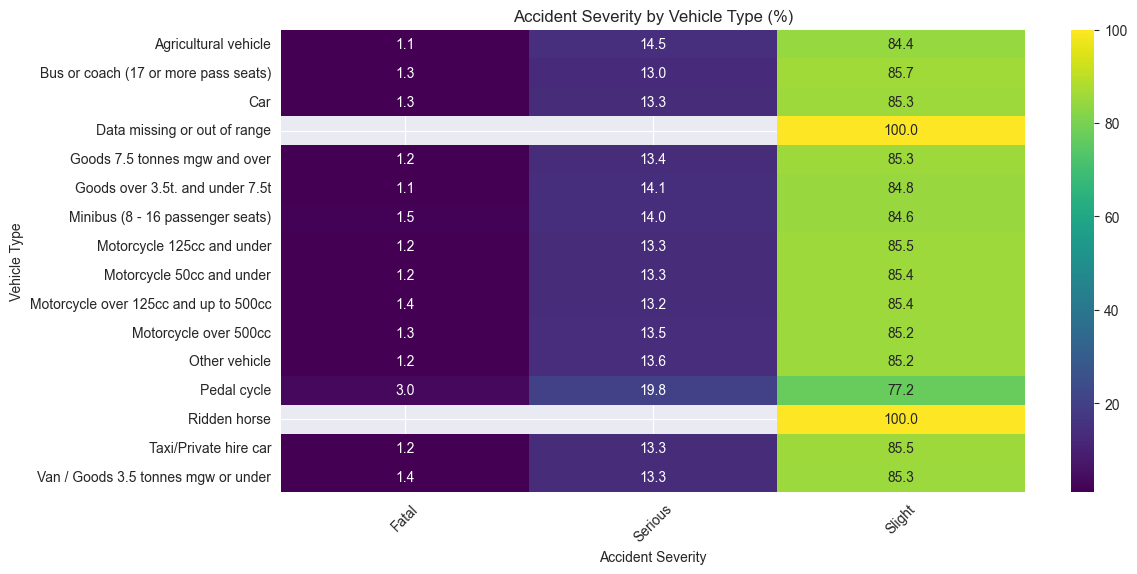

In [59]:
vehicle_severity = acci.groupby("Vehicle_Type")["Accident_Severity"].value_counts(normalize=True).unstack() * 100

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(vehicle_severity, annot=True, cmap="viridis", fmt=".1f")
plt.title("Accident Severity by Vehicle Type (%)")
plt.xlabel("Accident Severity")
plt.ylabel("Vehicle Type")
plt.xticks(rotation=45)
plt.show()

<h3>motor and bikes have higher fatality rates</h3>
<h3>Cars have more minor accidents but lower fatality rates</h3>

<h1>---------------------------------------------------------------------------------</h1>

<h1>Insight NO.20 - How does light conditon impact accident severity?</h1>

In [35]:
light_severity = acci.groupby("Light_Conditions")["Accident_Severity"].value_counts(normalize=True).unstack() * 100
print("Accident Severity by Light Condition (%):")
display(light_severity)


Accident Severity by Light Condition (%):


Accident_Severity,Fatal,Serious,Slight
Light_Conditions,,,
Darkness - lighting unknown,1.048735,12.245527,86.705737
Darkness - lights lit,1.438126,14.791047,83.770828
Darkness - lights unlit,1.769564,14.156508,84.073928
Darkness - no lighting,4.305901,19.162860,76.531239
Daylight,1.046857,12.530729,86.422414


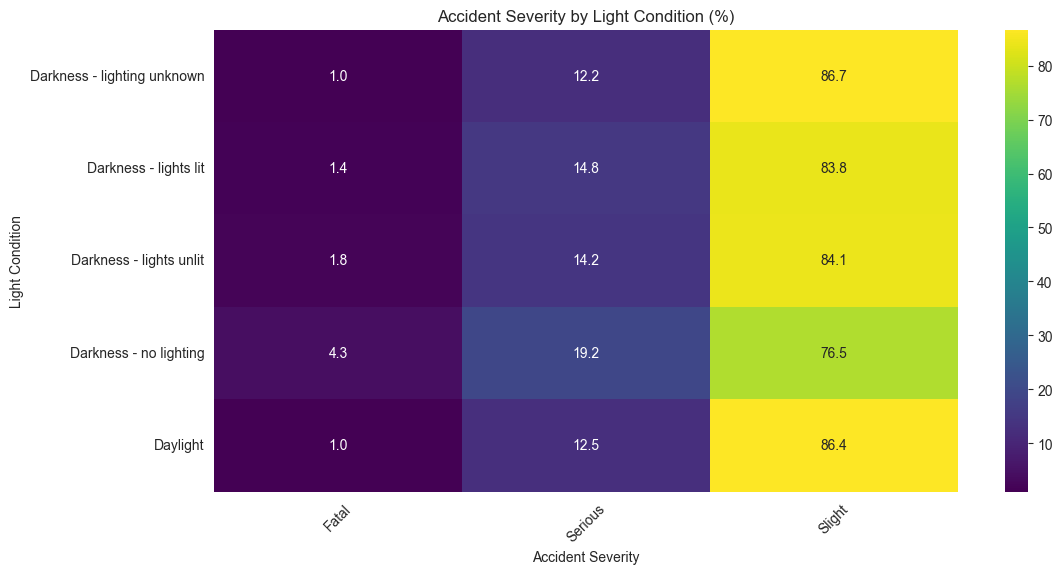

In [60]:
light_severity = acci.groupby("Light_Conditions")["Accident_Severity"].value_counts(normalize=True).unstack() * 100

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(light_severity, annot=True, cmap="viridis", fmt=".1f")
plt.title("Accident Severity by Light Condition (%)")
plt.xlabel("Accident Severity")
plt.ylabel("Light Condition")
plt.xticks(rotation=45)
plt.show()

<h3>dark conditons increase severity, as visibility is lower</h3>
<h3>Most minor accidents occur during daylight</h3>

<h1>----------------------------------------------------------</h1>

In [36]:
acci['Accident Date'] = pd.to_datetime(acci['Accident Date'], dayfirst = True, errors ='coerce')

In [37]:
acci['Year'] = acci['Accident Date'].dt.year

In [38]:
area_year = acci.groupby(['District Area','Year']).size().reset_index(name = 'Accident_Count')
pivot_table = area_year.pivot(index ='Year', columns ='District Area', values = 'Accident_Count')

In [39]:
pivot_table

District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Year,,,,,,,,,,,,,,,,,,,,,
2019.0,134.0,201.0,75.0,115.0,52.0,146.0,120.0,120.0,129.0,158.0,...,162.0,273.0,92.0,109.0,132.0,135.0,170.0,127.0,97.0,194.0
2020.0,203.0,299.0,78.0,138.0,46.0,137.0,116.0,109.0,135.0,145.0,...,153.0,259.0,85.0,101.0,156.0,177.0,190.0,124.0,95.0,172.0
2021.0,204.0,257.0,66.0,111.0,9.0,129.0,94.0,110.0,152.0,139.0,...,125.0,255.0,92.0,111.0,126.0,138.0,171.0,130.0,96.0,215.0
2022.0,NaN,NaN,46.0,79.0,NaN,107.0,NaN,NaN,139.0,104.0,...,101.0,214.0,82.0,82.0,120.0,101.0,164.0,115.0,93.0,171.0


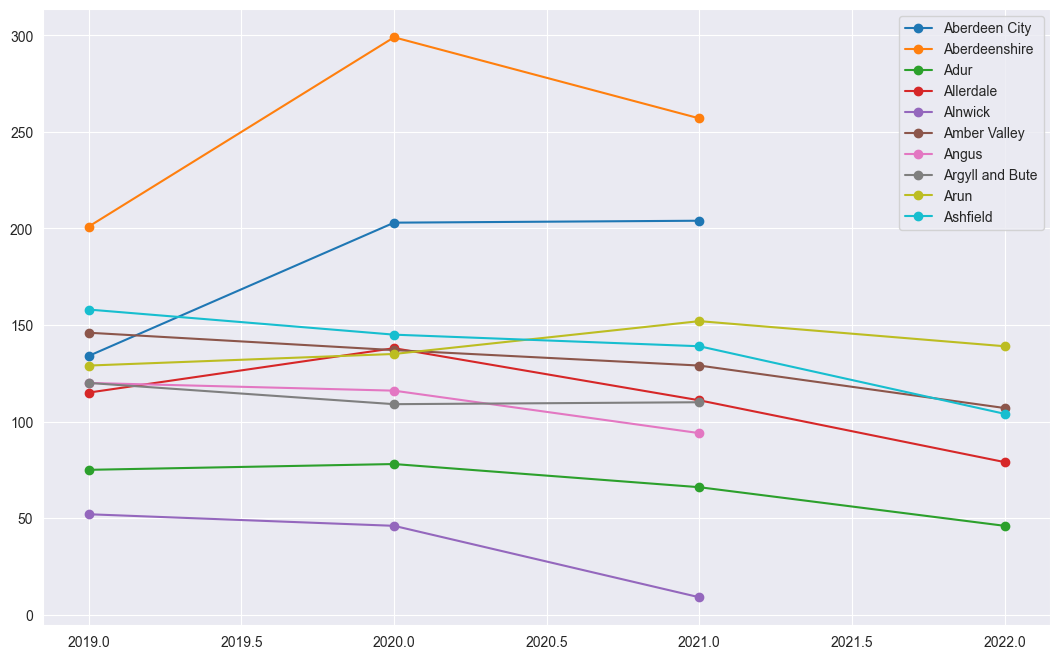

In [40]:
count = 0
for x in pivot_table:
    count+=1
    plt.plot(pivot_table.index,pivot_table[x],label = x, marker ='o')
    if count == 10:
        break

plt.gcf().set_size_inches(13,8)
plt.legend()
plt.show()

In [41]:
type_vh acci.groupby(['Road_Type','Vehicle_Type']).size().unstack()

sns.heatmap(type_vh, cmap='crest')
plt.show()

SyntaxError: invalid syntax (789007230.py, line 1)